### 1.- Carga de Información (Compartida por A. Ahedo)

In [110]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Cargar el conjunto de datos
df = pd.read_csv('df11.csv', encoding='ISO-8859-1')

# Asegurarse de que las columnas necesarias existan
if 'Body' not in df.columns or 'Sentiment' not in df.columns:
    raise ValueError("Las columnas necesarias no están presentes en el DataFrame.")


[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


### 2.- Tratamiento del texto

In [111]:
# Preprocesamiento de Texto
# Limpieza de datos
def clean_text(text):
    # Eliminar etiquetas HTML
    text = re.sub(r'<[^>]+>', '', text)
    # Eliminar caracteres especiales y dígitos
    text = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑ\s]', ' ', text)
    # Convertir el texto a minúsculas
    text = text.lower()
    # Eliminar espacios extras
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Clean_Body'] = df['Body'].apply(clean_text)

In [112]:

# Normalización de texto y eliminación de palabras vacías
spanish_stopwords = stopwords.words('spanish')
def normalize_text(text):
    words = word_tokenize(text)
    words = [word for word in words if word not in spanish_stopwords]
    return ' '.join(words)

df['Normalized_Body'] = df['Clean_Body'].apply(normalize_text)

In [113]:
# Tokenización y Lematización
stemmer = SnowballStemmer('spanish')
def stem_text(text):
    words = word_tokenize(text)
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

df['Stemmed_Body'] = df['Normalized_Body'].apply(stem_text)

In [114]:
# Vectorización de Texto
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Stemmed_Body'])

# El DataFrame 'df' ahora tiene una columna 'Stemmed_Body' que será utilizada para el análisis.
# 'tfidf_matrix' es la representación numérica de los comentarios que se utilizará para el modelado.


In [115]:
#pip install pandas matplotlib scikit-learn nltk

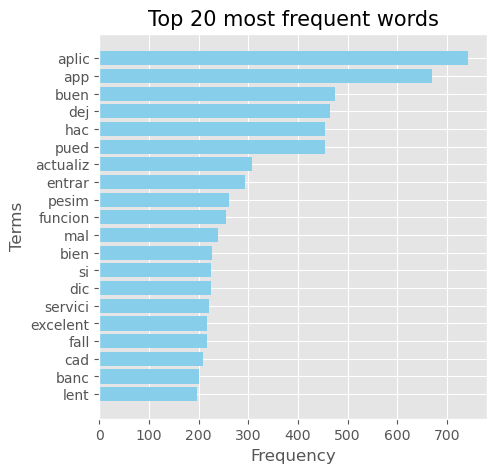

In [116]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Análisis Exploratorio de Datos (EDA) utilizando CountVectorizer para obtener la frecuencia de palabras

# Inicializamos CountVectorizer para obtener las frecuencias de todas las palabras
count_vec = CountVectorizer()
X_count = count_vec.fit_transform(df['Stemmed_Body'])

# Sumamos las frecuencias de cada término
sum_words = X_count.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vec.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Seleccionamos las top 20 palabras más frecuentes para visualizar
n_top_words = 20
top_words = words_freq[:n_top_words]
top_words_df = pd.DataFrame(top_words, columns=['Term', 'Frequency'])

# Gráfico de barras para las palabras más frecuentes
plt.figure(figsize=(5, 5))
plt.barh(top_words_df['Term'], top_words_df['Frequency'], color='skyblue')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Terms', fontsize=12)
plt.title(f'Top {n_top_words} most frequent words', fontsize=15)
plt.gca().invert_yaxis()  # Invierte el eje Y para que las barras más largas aparezcan arriba
plt.show()

# Insights:
# - Podemos observar cuáles son las palabras más utilizadas en los comentarios. 
# - Si las palabras más frecuentes están relacionadas con aspectos positivos o negativos, 
#   esto puede darnos una idea general de la percepción de los usuarios.

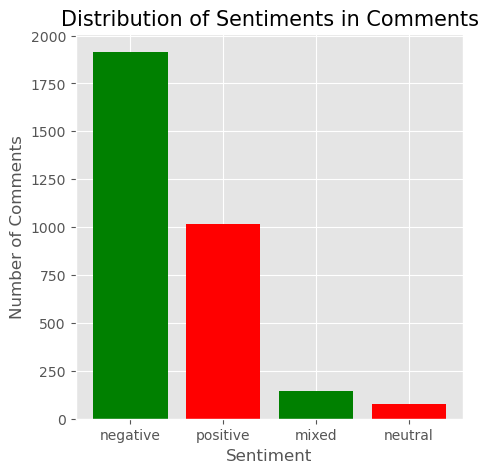

In [117]:
# Ahora analizamos la distribución de los sentimientos en los comentarios
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(5, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red'])
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)
plt.title('Distribution of Sentiments in Comments', fontsize=15)
plt.show()

# Insights:
# - La proporción de comentarios positivos frente a negativos puede indicar la satisfacción general del usuario.
# - Una gran cantidad de comentarios negativos podría ser un indicador de problemas que necesitan ser abordados.

# Nota: Asegúrate de que la columna 'Sentiment' tenga valores consistentes, como 'positive' y 'negative', para que el gráfico funcione correctamente.

### 3.- Visualizaciones y EDA

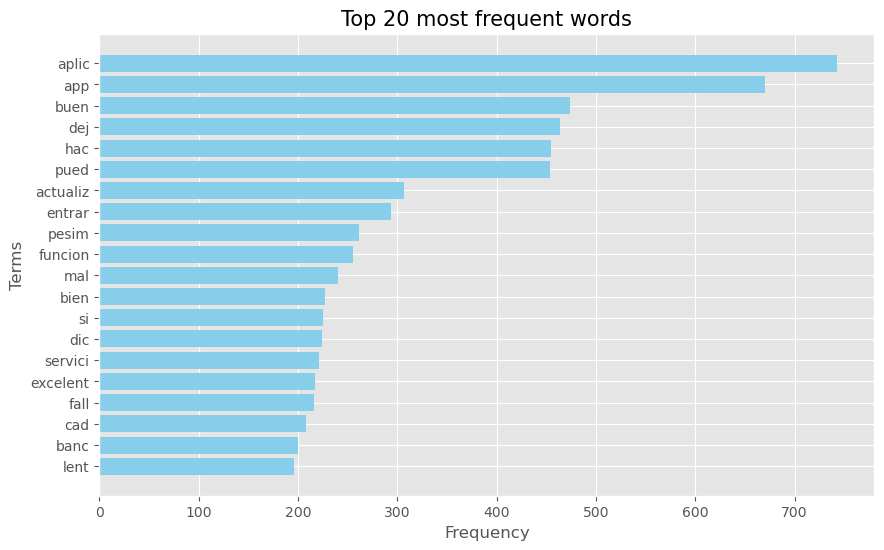

In [118]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Análisis Exploratorio de Datos (EDA) utilizando CountVectorizer para obtener la frecuencia de palabras

# Inicializamos CountVectorizer para obtener las frecuencias de todas las palabras
count_vec = CountVectorizer()
X_count = count_vec.fit_transform(df['Stemmed_Body'])

# Sumamos las frecuencias de cada término
sum_words = X_count.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vec.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Seleccionamos las top 20 palabras más frecuentes para visualizar
n_top_words = 20
top_words = words_freq[:n_top_words]
top_words_df = pd.DataFrame(top_words, columns=['Term', 'Frequency'])

# Gráfico de barras para las palabras más frecuentes
plt.figure(figsize=(10, 6))
plt.barh(top_words_df['Term'], top_words_df['Frequency'], color='skyblue')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Terms', fontsize=12)
plt.title(f'Top {n_top_words} most frequent words', fontsize=15)
plt.gca().invert_yaxis()  # Invierte el eje Y para que las barras más largas aparezcan arriba
plt.show()

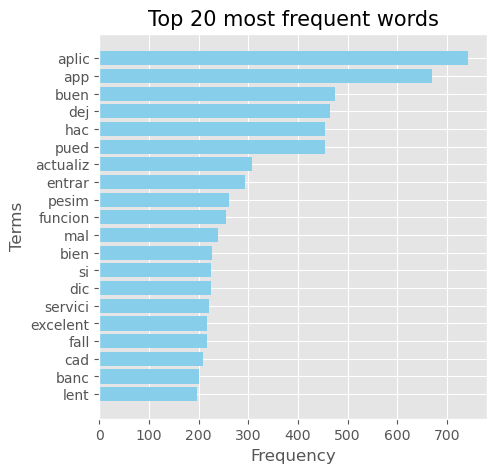

In [119]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Análisis Exploratorio de Datos (EDA) utilizando CountVectorizer para obtener la frecuencia de palabras

# Inicializamos CountVectorizer para obtener las frecuencias de todas las palabras
count_vec = CountVectorizer()
X_count = count_vec.fit_transform(df['Stemmed_Body'])

# Sumamos las frecuencias de cada término
sum_words = X_count.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vec.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Seleccionamos las top 20 palabras más frecuentes para visualizar
n_top_words = 20
top_words = words_freq[:n_top_words]
top_words_df = pd.DataFrame(top_words, columns=['Term', 'Frequency'])

# Gráfico de barras para las palabras más frecuentes
plt.figure(figsize=(5, 5))
plt.barh(top_words_df['Term'], top_words_df['Frequency'], color='skyblue')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Terms', fontsize=12)
plt.title(f'Top {n_top_words} most frequent words', fontsize=15)
plt.gca().invert_yaxis()  # Invierte el eje Y para que las barras más largas aparezcan arriba
plt.show()

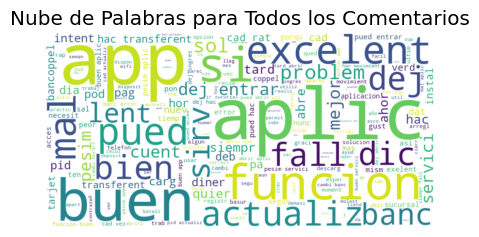

In [120]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Asumiendo que 'df' es el DataFrame que contiene la columna 'Stemmed_Body' y 'Date'

# Generar una nube de palabras para todos los comentarios
all_words = ' '.join(df['Stemmed_Body'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para Todos los Comentarios')
plt.show()

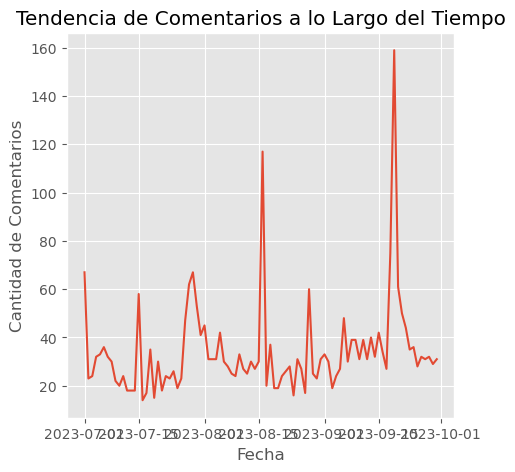

In [121]:
# Para analizar las tendencias a lo largo del tiempo, es necesario asegurarse de que la columna 'Date' esté en formato de fecha
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # 'coerce' convierte los errores en NaT (Not a Time)

# Agrupar los datos por fecha y contar el número de comentarios por día
trends = df.groupby(df['Date'].dt.date)['Stemmed_Body'].count()

# Graficar las tendencias de comentarios a lo largo del tiempo
plt.figure(figsize=(5, 5))
trends.plot()
plt.title('Tendencia de Comentarios a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Comentarios')
plt.show()

# Insights:
# - La nube de palabras proporciona una visualización directa de las palabras más frecuentes en todos los comentarios.
# - Si ciertas palabras son prominentes, esto puede indicar los temas más importantes o recurrentes en los comentarios.
# - El gráfico de tendencias por fecha puede mostrar si hay picos de actividad en ciertos días, lo que podría correlacionarse
#   con eventos específicos o lanzamientos de productos.

In [122]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Asegúrate de que 'positive_comments' y 'negative_comments' son series o listas que contienen los comentarios positivos y negativos respectivamente.

# Nube de palabras para comentarios positivos
positive_words = ' '.join(positive_comments)
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_words)

# Nube de palabras para comentarios negativos
negative_words = ' '.join(negative_comments)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_words)

# Visualización de nubes de palabras

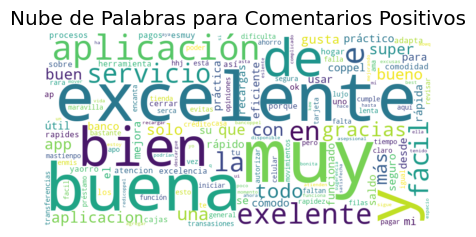

In [123]:
# Nube de palabras para comentarios positivos
plt.figure(figsize=(5, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para Comentarios Positivos')
plt.show()

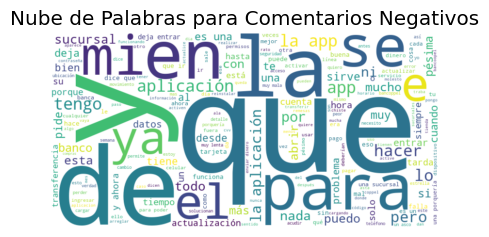

In [124]:
# Nube de palabras para comentarios negativos
plt.figure(figsize=(5, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para Comentarios Negativos')
plt.show()

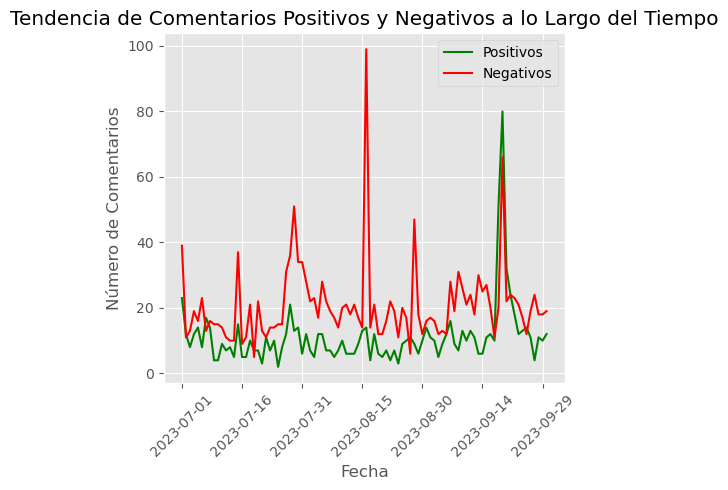

In [125]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Asegúrate de que 'df' es tu DataFrame que contiene las columnas 'Date' y 'Sentiment'
# y que la columna 'Date' está en formato datetime. Si no es así, conviértela con:
# df['Date'] = pd.to_datetime(df['Date'])

# Convertir la columna 'Date' a formato datetime si aún no se ha hecho
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Agrupar por fecha y sentimiento, y contar el número de comentarios
trends = df.groupby([df['Date'].dt.date, 'Sentiment']).size().unstack(fill_value=0)

# Crear un gráfico de líneas para mostrar las tendencias de comentarios positivos y negativos a lo largo del tiempo
plt.figure(figsize=(5, 5))
plt.plot(trends.index, trends['positive'], color='green', label='Positivos')
plt.plot(trends.index, trends['negative'], color='red', label='Negativos')

# Formato del eje x para mostrar las fechas de forma legible
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # Ajusta este valor según tu conjunto de datos

plt.title('Tendencia de Comentarios Positivos y Negativos a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Comentarios')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar la subtrama para que todo encaje en el área de la figura
plt.show()

### 03.- Modelo

### 0a.- Naive Bayes

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix, 
    df['Sentiment'], 
    test_size=0.2, 
    random_state=42
)

# Inicializar el clasificador Naive Bayes
nb_classifier = MultinomialNB()

# Entrenar el clasificador
nb_classifier.fit(X_train, y_train)

# Predecir los sentimientos en el conjunto de prueba
y_pred = nb_classifier.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Accuracy: 0.8860759493670886
              precision    recall  f1-score   support

       mixed       0.00      0.00      0.00        29
    negative       0.87      0.99      0.92       391
     neutral       0.00      0.00      0.00        10
    positive       0.93      0.86      0.89       202

    accuracy                           0.89       632
   macro avg       0.45      0.46      0.45       632
weighted avg       0.83      0.89      0.86       632



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 0b.- LDA

In [127]:
from sklearn.decomposition import LatentDirichletAllocation

# Asumiendo que ya tienes una matriz TF-IDF llamada 'tfidf_matrix'
# y que 'df' es tu DataFrame original.

# Inicializamos LDA con el número deseado de temas
lda = LatentDirichletAllocation(n_components=5, random_state=42)

# Ajustamos el modelo LDA a la matriz TF-IDF
lda.fit(tfidf_matrix)

# Podemos examinar los temas y sus principales palabras
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Tema {topic_idx+1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

# Transformamos los documentos a distribución de temas
lda_transformed = lda.transform(tfidf_matrix)

# Asignamos el tema más prominente a cada documento
df['Tema'] = lda_transformed.argmax(axis=1)


Tema 1:
pesim aplic app abre abrir actualiz tard lent error dej
Tema 2:
sirv mal graci funcion util aplic basur gust malisim app
Tema 3:
fall aplicacion porqu facil usar aplic siempr app horari cad
Tema 4:
bien dej pued hac lent entrar app aplic actualiz funcion
Tema 5:
buen excelent exelent servici aplic app practic mejor recom eficient


### 0c.- SVM

In [128]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix, 
    df['Sentiment'], 
    test_size=0.2, 
    random_state=42
)

# Inicializar el clasificador SVM con un kernel lineal
svm_classifier = SVC(kernel='linear')

# Entrenar el clasificador
svm_classifier.fit(X_train, y_train)

# Predecir los sentimientos en el conjunto de prueba
y_pred_svm = svm_classifier.predict(X_test)

# Evaluación del modelo SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("Accuracy (SVM):", accuracy_svm)
print("Classification Report (SVM):\n", report_svm)


Accuracy (SVM): 0.9066455696202531
Classification Report (SVM):
               precision    recall  f1-score   support

       mixed       0.00      0.00      0.00        29
    negative       0.91      0.98      0.94       391
     neutral       0.00      0.00      0.00        10
    positive       0.90      0.94      0.92       202

    accuracy                           0.91       632
   macro avg       0.45      0.48      0.47       632
weighted avg       0.85      0.91      0.88       632



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 0d.- Neural Network

y_train shape: (2524,)
y_test shape: (632,)
Epoch 1/10
253/253 [==============================] - 1s 4ms/step - loss: 1.0613 - accuracy: 0.7155 - val_loss: 0.7250 - val_accuracy: 0.8291
Epoch 2/10
253/253 [==============================] - 1s 2ms/step - loss: 0.5740 - accuracy: 0.8693 - val_loss: 0.4636 - val_accuracy: 0.9003
Epoch 3/10
253/253 [==============================] - 1s 5ms/step - loss: 0.4109 - accuracy: 0.9073 - val_loss: 0.3917 - val_accuracy: 0.9035
Epoch 4/10
253/253 [==============================] - 2s 6ms/step - loss: 0.3447 - accuracy: 0.9113 - val_loss: 0.3639 - val_accuracy: 0.9066
Epoch 5/10
253/253 [==============================] - 1s 4ms/step - loss: 0.3018 - accuracy: 0.9144 - val_loss: 0.3462 - val_accuracy: 0.9082
Epoch 6/10
253/253 [==============================] - 1s 3ms/step - loss: 0.2655 - accuracy: 0.9180 - val_loss: 0.3398 - val_accuracy: 0.9066
Epoch 7/10
253/253 [==============================] - 1s 4ms/step - loss: 0.2349 - accuracy: 0.9216 - va

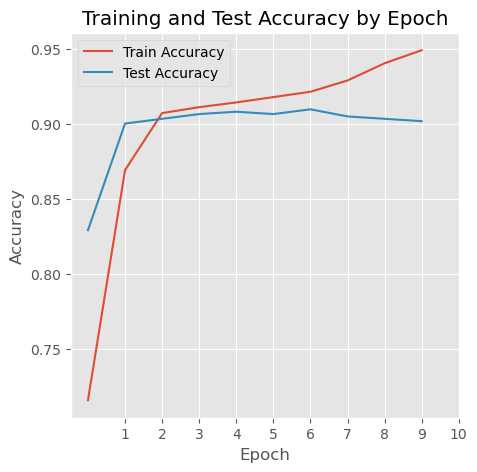

In [129]:
from sklearn.preprocessing import LabelEncoder

# Codificar las etiquetas de texto a enteros
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Verificar las formas de las etiquetas después de la codificación
print("y_train shape:", y_train_encoded.shape)
print("y_test shape:", y_test_encoded.shape)

# Asegurarse de que las etiquetas son un arreglo 1D
assert y_train_encoded.ndim == 1
assert y_test_encoded.ndim == 1

# Construir el modelo de red neuronal
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # num_classes es la cantidad de etiquetas únicas

# Compilar el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    X_train.toarray(), y_train_encoded, # Se convierte la matriz dispersa a densa
    epochs=10,
    verbose=True,
    validation_data=(X_test.toarray(), y_test_encoded), # Se convierte la matriz dispersa a densa
    batch_size=10
)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test.toarray(), y_test_encoded, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

# Prepararse para mostrar la evolución del entrenamiento
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Training and Test Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11), range(1, 11))
plt.legend()
plt.show()


Accuracy: 0.9019
20/20 [==============================] - 0s 4ms/step
Classification Report (Neural Network):
               precision    recall  f1-score   support

       mixed       0.20      0.03      0.06        29
    negative       0.92      0.96      0.94       391
     neutral       0.00      0.00      0.00        10
    positive       0.88      0.95      0.92       202

    accuracy                           0.90       632
   macro avg       0.50      0.49      0.48       632
weighted avg       0.86      0.90      0.88       632



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


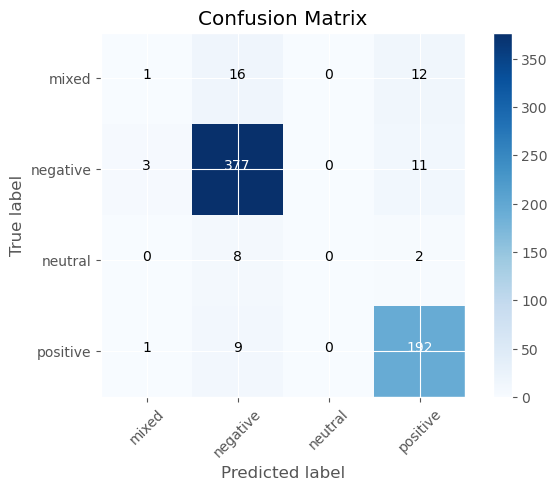

In [130]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Evaluar el modelo de red neuronal y mostrar métricas de desempeño
loss, accuracy = model.evaluate(X_test.toarray(), y_test_encoded, verbose=False)
print(f'Accuracy: {accuracy:.4f}')

# Predecir las etiquetas en el conjunto de prueba
y_pred_nn = model.predict(X_test.toarray())

# Las predicciones vienen como probabilidades por clase. Convertir esto a etiquetas finales
y_pred_nn = np.argmax(y_pred_nn, axis=1)

# Generar el reporte de clasificación
report_nn = classification_report(y_test_encoded, y_pred_nn, target_names=encoder.classes_)
print("Classification Report (Neural Network):\n", report_nn)

# Generar la matriz de confusión
confusion_matrix_nn = confusion_matrix(y_test_encoded, y_pred_nn)

# Función para graficar la matriz de confusión
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Graficar la matriz de confusión
plt.figure()
plot_confusion_matrix(confusion_matrix_nn, classes=encoder.classes_)
plt.show()


Accuracy: 0.9019
20/20 [==============================] - 0s 2ms/step
Classification Report (Neural Network):
               precision    recall  f1-score   support

       mixed       0.20      0.03      0.06        29
    negative       0.92      0.96      0.94       391
     neutral       0.00      0.00      0.00        10
    positive       0.88      0.95      0.92       202

    accuracy                           0.90       632
   macro avg       0.50      0.49      0.48       632
weighted avg       0.86      0.90      0.88       632



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


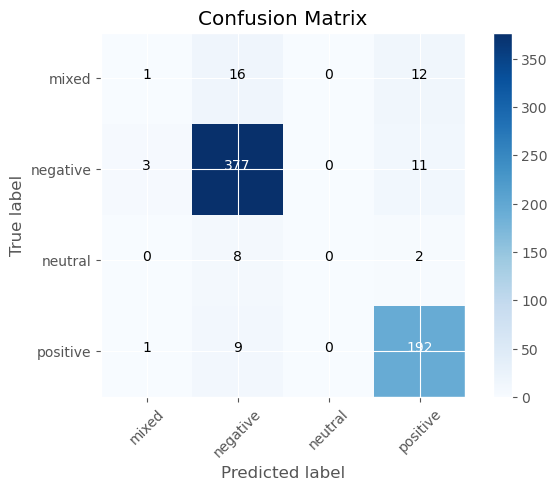

In [131]:
# Evaluar el modelo de red neuronal y mostrar métricas de desempeño
loss, accuracy = model.evaluate(X_test.toarray(), y_test_encoded, verbose=False)
print(f'Accuracy: {accuracy:.4f}')

# Predecir las etiquetas en el conjunto de prueba
y_pred_nn = model.predict(X_test.toarray())

# Las predicciones vienen como probabilidades por clase. Convertir esto a etiquetas finales
y_pred_nn = np.argmax(y_pred_nn, axis=1)

# Generar el reporte de clasificación
report_nn = classification_report(y_test_encoded, y_pred_nn, target_names=encoder.classes_)

print("Classification Report (Neural Network):\n", report_nn)

# Generar la matriz de confusión
confusion_matrix_nn = confusion_matrix(y_test_encoded, y_pred_nn)

# Función para graficar la matriz de confusión
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Graficar la matriz de confusión
plt.figure()
plot_confusion_matrix(confusion_matrix_nn, classes=encoder.classes_)
plt.show()



### 0e.- Transformers

In [99]:
#pip install transformers

In [100]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Cargar el tokenizer y el modelo preentrenado de BERT
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=num_classes)

# Codificar los datos para el modelo
def convert_examples_to_tf_dataset(examples, labels, tokenizer):
    input_ids = []
    attention_masks = []

    for example in examples:
        bert_input = tokenizer.encode_plus(
            example,
            add_special_tokens=True,  # Añadir '[CLS]' y '[SEP]'
            max_length=128,  # Truncar/completar hasta la longitud máxima
            padding='max_length',  # Añadir padding hasta la longitud máxima
            return_attention_mask=True,  # Retornar la máscara de atención
            truncation=True
        )
        input_ids.append(bert_input['input_ids'])
        attention_masks.append(bert_input['attention_mask'])

    input_ids = tf.convert_to_tensor(input_ids)
    attention_masks = tf.convert_to_tensor(attention_masks)
    labels = tf.convert_to_tensor(labels)

    return input_ids, attention_masks, labels

# Preparar el conjunto de datos para BERT
X = df['Body']  # Asegúrate de que 'Body' sea la columna con el texto sin procesar
y = df['Sentiment']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Codificar las etiquetas
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Convertir los ejemplos a un formato compatible con TensorFlow
train_input_ids, train_attention_masks, y_train_encoded = convert_examples_to_tf_dataset(X_train, y_train_encoded, tokenizer)
test_input_ids, test_attention_masks, y_test_encoded = convert_examples_to_tf_dataset(X_test, y_test_encoded, tokenizer)

# Compilar el modelo de BERT
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Entrenar el modelo
bert_history = bert_model.fit(
    [train_input_ids, train_attention_masks],
    y_train_encoded,
    validation_data=([test_input_ids, test_attention_masks], y_test_encoded),
    epochs=3,
    batch_size=8
)

# Evaluar el modelo
bert_loss, bert_accuracy = bert_model.evaluate([test_input_ids, test_attention_masks], y_test_encoded)
print("BERT Accuracy: {:.4f}".format(bert_accuracy))

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
316/316 [==============================] - 3119s 10s/step - loss: 0.5339 - accuracy: 0.8431 - val_loss: 0.4260 - val_accuracy: 0.8972
Epoch 2/3
316/316 [==============================] - 2497s 8s/step - loss: 0.3431 - accuracy: 0.9041 - val_loss: 0.3168 - val_accuracy: 0.9177
Epoch 3/3
20/20 [==============================] - 89s 4s/step - loss: 0.3475 - accuracy: 0.9114
BERT Accuracy: 0.9114


In [101]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predecir las etiquetas en el conjunto de prueba con el modelo BERT
predictions = bert_model.predict([test_input_ids, test_attention_masks], batch_size=8)
# El atributo .logits representa las salidas finales antes de la función de activación softmax
predicted_classes = np.argmax(predictions.logits, axis=-1)

# Generar el reporte de clasificación
report = classification_report(y_test_encoded, predicted_classes, target_names=encoder.classes_)
print("Classification Report:\n", report)

# Generar la matriz de confusión
confusion_mtx = confusion_matrix(y_test_encoded, predicted_classes)

# Utiliza la función plot_confusion_matrix que te proporcioné antes para visualizar la matriz de confusión.


79/79 [==============================] - 105s 1s/step
Classification Report:
               precision    recall  f1-score   support

       mixed       0.00      0.00      0.00        29
    negative       0.94      0.96      0.95       391
     neutral       0.24      0.40      0.30        10
    positive       0.92      0.97      0.94       202

    accuracy                           0.91       632
   macro avg       0.52      0.58      0.55       632
weighted avg       0.88      0.91      0.90       632



20/20 [==============================] - 89s 4s/step
              precision    recall  f1-score   support

       mixed       0.00      0.00      0.00        29
    negative       0.94      0.96      0.95       391
     neutral       0.24      0.40      0.30        10
    positive       0.92      0.97      0.94       202

    accuracy                           0.91       632
   macro avg       0.52      0.58      0.55       632
weighted avg       0.88      0.91      0.90       632



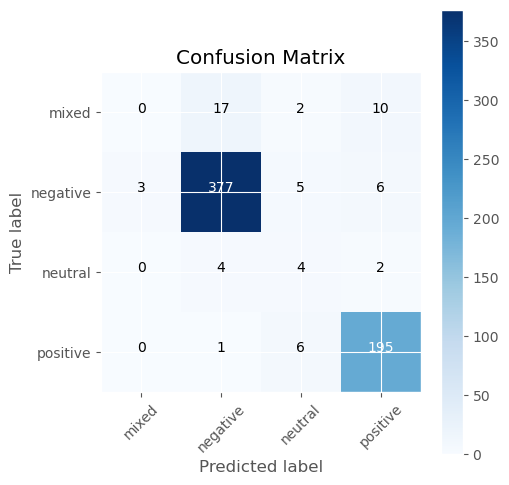

In [102]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Suponiendo que bert_model es tu modelo ya entrenado y que tienes:
# test_input_ids, test_attention_masks, y y_test_encoded que son tus datos de prueba.

# Predecir las etiquetas en el conjunto de prueba
predictions = bert_model.predict([test_input_ids, test_attention_masks])
predicted_classes = np.argmax(predictions.logits, axis=1)

# Generar el reporte de clasificación
report = classification_report(y_test_encoded, predicted_classes, target_names=encoder.classes_)
print(report)

# Generar la matriz de confusión
confusion_mtx = confusion_matrix(y_test_encoded, predicted_classes)

# Función para graficar la matriz de confusión
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Etiquetar cada división con el número correspondiente
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Graficar la matriz de confusión
plt.figure(figsize=(5,5))
plot_confusion_matrix(confusion_mtx, classes=encoder.classes_)
plt.show()

### Tratamiento de información quitando stopwords 

In [103]:
from nltk.corpus import stopwords

# Descargar la lista de stop words si no se ha descargado previamente
nltk.download('stopwords')

# Cargar las stop words en español
spanish_stopwords = stopwords.words('spanish')

# Actualizar la lista con tus propias palabras si es necesario
spanish_stopwords.extend(['y', 'o', 'tu'])

# Función para eliminar stop words del texto
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in spanish_stopwords]
    return ' '.join(filtered_words)

# Aplicar la función a tu columna de texto
df['Clean_Body'] = df['Clean_Body'].apply(remove_stopwords)


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [104]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Asegúrate de que las stopwords de NLTK están descargadas
nltk.download('stopwords')

# Definir una función para eliminar stopwords
def remove_stopwords(text, language='spanish'):
    stop_words = set(stopwords.words(language))
    return ' '.join(word for word in text.split() if word not in stop_words)

# Aplicar la función a tus datos
df['Processed_Body'] = df['Clean_Body'].apply(remove_stopwords)


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [105]:
# Definir una función para generar nubes de palabras
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [132]:
# Generar una nube de palabras para comentarios positivos
positive_text = df[df['Sentiment'] == 'positive']['Processed_Body'].str.cat(sep=' ')
generate_wordcloud(positive_text, 'Nube de Palabras para Comentarios Positivos')

KeyError: 'Processed_Body'

In [ ]:
# Generar una nube de palabras para comentarios negativos
negative_text = df[df['Sentiment'] == 'negative']['Processed_Body'].str.cat(sep=' ')
generate_wordcloud(negative_text, 'Nube de Palabras para Comentarios Negativos')

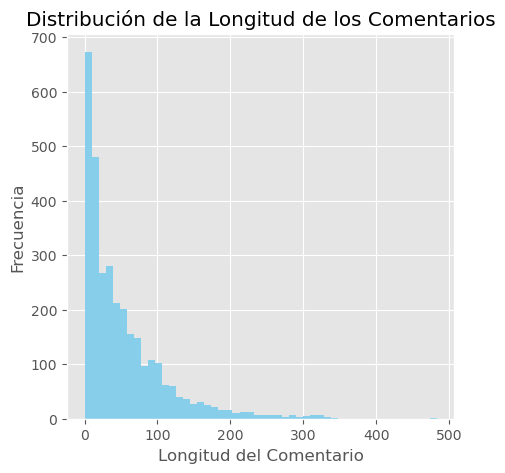

In [106]:
# Análisis de la longitud de los comentarios
df['Comment_Length'] = df['Processed_Body'].apply(len)

# Graficar la distribución de la longitud de los comentarios
plt.figure(figsize=(5, 5))
plt.hist(df['Comment_Length'], bins=50, color='skyblue')
plt.title('Distribución de la Longitud de los Comentarios')
plt.xlabel('Longitud del Comentario')
plt.ylabel('Frecuencia')
plt.show()

# Frecuencia de palabras específicas después de limpiar stopwords
# Puedes usar CountVectorizer o simplemente contar con pandas
from collections import Counter

word_freq = Counter(" ".join(df['Processed_Body']).split()).most_common(20)
word_freq_df = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])

In [ ]:
# Graficar las palabras más frecuentes
plt.figure(figsize=(5, 5))
plt.barh(word_freq_df['Word'], word_freq_df['Frequency'], color='skyblue')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.title('Top 20 Most Frequent Words After Cleaning', fontsize=15)
plt.gca().invert_yaxis()
plt.show()

In [107]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Body'])

In [108]:
# Calcular las palabras más comunes para ambos grupos utilizando las puntuaciones TF-IDF
def get_top_tfidf_words(tfidf_vector, feature_names, top_n=20):
    # Sumamos a lo largo de las filas para obtener el total de TF-IDF por palabra
    summed_tfidf = tfidf_vector.sum(axis=0)
    # Convertimos a un array 1D
    summed_tfidf_array = np.array(summed_tfidf).flatten()
    # Obtenemos los índices de las mayores puntuaciones
    top_indices = summed_tfidf_array.argsort()[-top_n:]
    # Retornamos las palabras correspondientes a esos índices
    return feature_names[top_indices]

# Extraer los nombres de las características (palabras)
feature_names = np.array(tfidf_vectorizer.get_feature_names())

# Calculamos las palabras más comunes para ambos grupos
top_positive_words = get_top_tfidf_words(tfidf_matrix[positive_indices, :], feature_names)
top_negative_words = get_top_tfidf_words(tfidf_matrix[negative_indices, :], feature_names)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


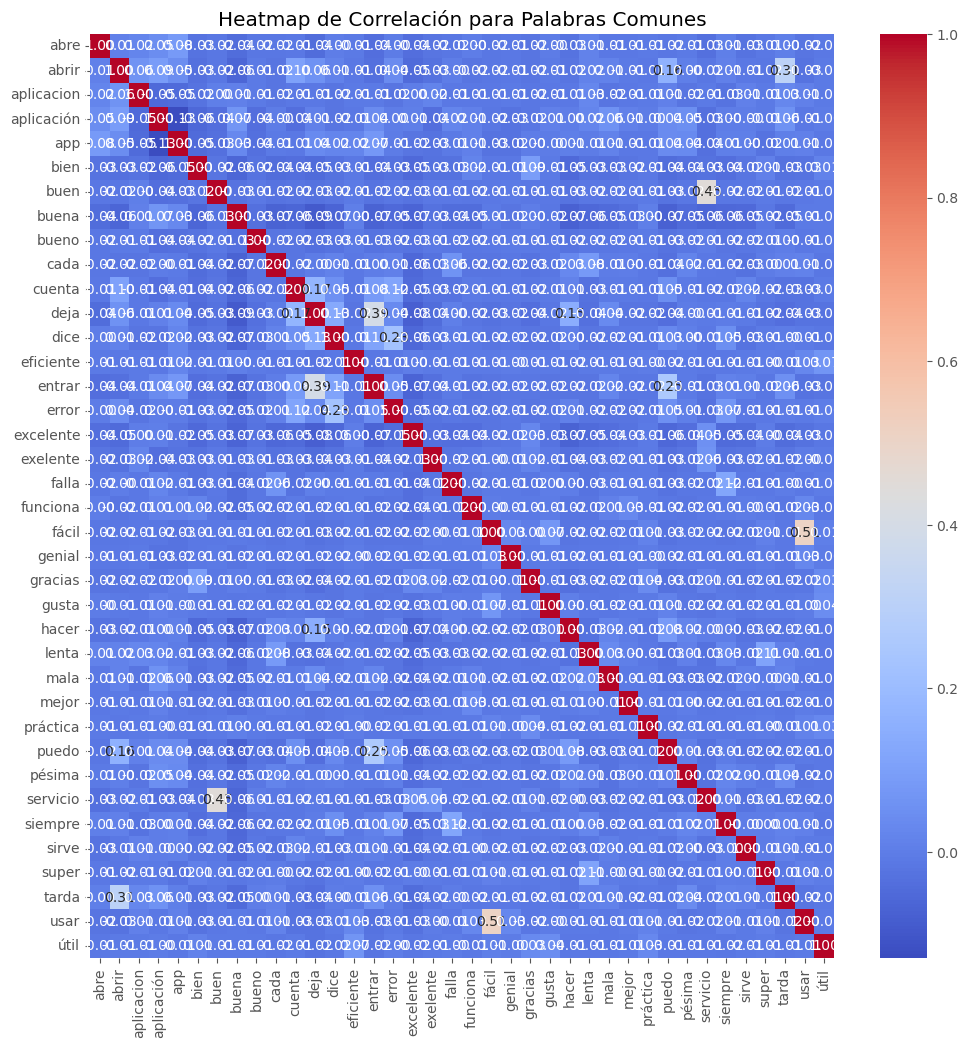

In [109]:
# Asumiendo que ya tienes la matriz TF-IDF: tfidf_matrix y los nombres de las características: feature_names

# Sumar las puntuaciones TF-IDF para cada palabra
tfidf_sum_by_class = {
    'positive': np.asarray(tfidf_matrix[positive_indices].sum(axis=0)).flatten(),
    'negative': np.asarray(tfidf_matrix[negative_indices].sum(axis=0)).flatten(),
}

# Identificar las palabras más comunes para cada sentimiento
top_words_by_class = {
    sentiment: sorted(zip(feature_names, tfidf_sums), key=lambda x: x[1], reverse=True)[:20]
    for sentiment, tfidf_sums in tfidf_sum_by_class.items()
}

# Extraer las características más comunes en todos los comentarios
all_top_words = set(word for words in top_words_by_class.values() for word, _ in words)

# Construir un DataFrame con las puntuaciones TF-IDF para estas palabras
columns = sorted(all_top_words)  # Ordenamos las palabras para tener columnas consistentes
tfidf_top_words_matrix = tfidf_matrix[:, [tfidf_vectorizer.vocabulary_[word] for word in columns]]
df_top_words = pd.DataFrame(tfidf_top_words_matrix.toarray(), columns=columns)

# Calcular la matriz de correlación
correlation_matrix = df_top_words.corr()

# Generar el heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Heatmap de Correlación para Palabras Comunes')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Preprocesamiento y Limpieza de Datos:
Se realizó una limpieza exhaustiva de los datos, eliminando caracteres especiales, direcciones de correo electrónico y URLs para obtener un conjunto de datos depurado. Se aplicó la normalización de texto, convirtiendo todo el corpus a minúsculas y corrigiendo errores ortográficos. Se implementaron técnicas de lematización y eliminación de palabras vacías para refinar los tokens (unidades semánticas) que se sometieron a análisis posterior.

Vectorización y Análisis Exploratorio de Datos (EDA):
Se transformó el texto limpio en vectores numéricos a través de la vectorización TF-IDF, destacando la importancia relativa de las palabras dentro de los comentarios. El EDA reveló las palabras más frecuentes y su relevancia a través de gráficos y nubes de palabras, identificando términos clave asociados a percepciones positivas y negativas.

Modelado con Machine Learning:
Se entrenaron varios modelos de clasificación:

1. Naive Bayes: Un modelo probabilístico que asume independencia entre las palabras, sirviendo como punto de partida para la clasificación de sentimientos.
2. SVM (Máquinas de Vectores de Soporte): Este modelo buscó maximizar el margen de separación entre clases, probando ser robusto y eficaz para textos de alta dimensión.
3. Redes Neuronales: Se diseñó una red con una capa oculta para modelar complejidades no lineales y capturar interacciones entre términos.
4. Transformers (BERT): Se empleó este modelo de vanguardia que entiende el contexto bidireccional de las palabras, estableciendo un nuevo estándar en el análisis de lenguaje natural.

Resultados y Visualización de Datos:
Las métricas de desempeño indicaron una alta precisión en la clasificación de sentimientos, y las visualizaciones como nubes de palabras y heatmaps de correlación aportaron una comprensión intuitiva de los patrones subyacentes. La distribución de las puntuaciones TF-IDF resaltó las palabras que influyen en la percepción de la marca y la satisfacción del cliente.

Conclusiones Estratégicas para Retail:
Los hallazgos sugieren puntos de acción claros para mejorar la experiencia del cliente:

- Optimización del Servicio: Los comentarios negativos proporcionan una hoja de ruta para abordar las áreas críticas de mejora en el servicio.
- Personalización de la Oferta: Las palabras clave identificadas pueden guiar el desarrollo de productos y la personalización de las campañas de marketing.
- Monitoreo Continuo: La implementación de modelos de ML permite un monitoreo en tiempo real de la percepción del cliente, vital para la gestión proactiva de la reputación.

Recomendaciones:
Se recomienda continuar refinando los modelos de ML con datos actualizados para mantener y mejorar la precisión del análisis de sentimientos. Se debe poner un énfasis particular en la retroalimentación obtenida de los comentarios negativos, convirtiendo los desafíos en oportunidades de crecimiento y fidelización de clientes.

La combinación de técnicas de NLP y modelos avanzados de ML ha demostrado ser una estrategia poderosa para entender y actuar sobre la voz del cliente en el sector de retail. La inteligencia de negocio derivada de este análisis representa un activo estratégico que impulsa la innovación centrada en el cliente y la excelencia operativa.